## TP1: Performance evaluation

In this practical session you  are going to manipulate the sklearn library.
The main goal is to analyze the performance of several methods on a binary classification task.
You will experiment with different metrics that can be used to evaluate the performance.


## Dataset loading

The breast cancer dataset is a binary classification dataset.
We are first interested to know the input dimensionality, the number of samples, the number of positive samples and the ratio of positive samples in the dataset.

In [40]:
from sklearn import datasets

dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

input_dimension = X.shape
nb_samples = X.shape[0]

from numpy import sum

nb_positives = sum(y)
positive_ratio = nb_positives/nb_samples
print(dataset.target)


print("Input dimension: ", input_dimension)
print("Nb of samples in the full dataset: ", nb_samples)
print("Nb of positive samples", nb_positives)
print("Positive Ratio:", positive_ratio)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

*Q*: What is the sample dimension?

*Q*: How many samples does the dataset contain?

*Q*: What is the positive ratio in the dataset?

### Dataset split
Now we are going to perform a split of the data for the evaluation. Use the train_test_split function with a test_size parameter of 0.3.

Then compute the number of samples in the train and test set, as well as their positive ratio.

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

nb_samples_train = X_train.shape[0]
nb_samples_test = X_test.shape[0]

nb_train_positives = sum(y_train)
nb_test_positives = sum(y_test)

train_positive_ratio = nb_train_positives/nb_samples_train
test_positive_ratio = nb_test_positives/nb_samples_test

print("Nb samples train", nb_samples_train)
print("Nb samples test", nb_samples_test)
print("Nb of positive train samples", nb_train_positives)
print("Nb of positive test samples", nb_test_positives)
print("Train Positive Ratio:", train_positive_ratio)
print("Test Positive Ratio:", test_positive_ratio)


Nb samples train 398
Nb samples test 171
Nb of positive train samples 246
Nb of positive test samples 111
Train Positive Ratio: 0.6180904522613065
Test Positive Ratio: 0.6491228070175439


Q: How many samples do you have in the training set?

Q: How many samples in the test set?

Q: Are the train and test positive ratios similar ? (answer will differ depending on the random state)

## Train and evaluate methods

We are now going to train some classification methods on the train data.
For today we are going to use Nearest Neighbor, Logistic Regression and a Decision Tree.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=3)
clf_tree = DecisionTreeClassifier();
clf_log = LogisticRegression(max_iter=5000);

clf_nn.fit(X_train, y_train);
clf_tree.fit(X_train, y_train);
clf_log.fit(X_train, y_train);

Once the classifiers trained, they are ready to ```predict```. Use the prediction functions to obtain the predictions on the test data.

Sometimes it is interesting to not only look at the final prediction, but to have a look at the predicted probability. You can use the ```predict_proba``` function. From its output, for all predictions, you can keep the probability of the second class (having cancer). This is effectively performed with the python selector [:,1].

Q: For the nearest neighbor method, print the difference between the predictions and the probabilities. As you will see they are not zero. Predictions are binary, while probabilities are floats.

In [43]:
y_pred_nn = clf_nn.predict(X_test)
y_pred_tree = clf_tree.predict(X_test)
y_pred_log = clf_log.predict(X_test)

y_proba_nn = clf_nn.predict_proba(X_test)
y_proba_tree = clf_tree.predict_proba(X_test)
y_proba_log =clf_log.predict_proba(X_test)

diff = y_pred_nn - y_proba_nn[:,1] # TODO

print("Difference between prediction and probability", diff)


Difference between prediction and probability [ 0.          0.          0.          0.          0.          0.
  0.          0.33333333 -0.33333333  0.          0.          0.
  0.          0.          0.          0.33333333  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.33333333  0.          0.         -0.33333333  0.          0.33333333
  0.33333333  0.          0.          0.          0.         -0.33333333
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.33333333  0.33333333  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.33333333  0.

To have a sense of the difficulty of the problem it is usually helpful to evaluate simple baselines.
In this case we ask you to generate three baseline results:
- The results of a random method: use ```random.ramdom(N)``` to generate N probabilities between 0 and 1, and use ```rint``` to round them to final binary predictions.
- The results of a methods *always* classifying as "there is cancer", just use the ```ones``` method.
- The results of a methods *never* classifying as "there is cancer", just use the ```zeros``` method.

In [44]:
# create baselines
from numpy import random, zeros, ones, rint


y_proba_random =  random.random(nb_samples_test)
y_pred_random = rint(y_proba_random)
y_pred_zeros = zeros(nb_samples_test)
y_pred_ones = ones(nb_samples_test)


## Metrics
Now that we have predictions and probabilities of 6 methods we are going to compare them with standard metrics.

First we want to compute their accuracy, precision, recall and f1_score. Use the ```accuracy_score```, ```precision_score```, ```recall_score``` and  ```f1_score``` to compute them.

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from numpy import rint
import numpy as np

def printMetrics(method_title, test_data, pred_data):
    print(method_title)
    print("\tAccuracy ", accuracy_score(test_data,pred_data)) # TODO
    print("\tPrecision ", precision_score(test_data,pred_data)) # TODO
    print("\tRecall ", recall_score(test_data,pred_data))# TODO
    print("\tF1 score", f1_score(test_data,pred_data)) # TODO

printMetrics("Nearest Neighbors:", y_test,y_pred_nn) # TODO
printMetrics("Decision Tree:", y_test,y_pred_tree) # TODO
printMetrics("Logistic Regression:", y_test,y_pred_log ) # TODO
printMetrics("Random:", y_test,y_pred_random ) # TODO
printMetrics("Always:", y_test,y_pred_ones ) # TODO
printMetrics("Never:", y_test, y_pred_zeros ) # TODO


Nearest Neighbors:
	Accuracy  0.9415204678362573
	Precision  0.9469026548672567
	Recall  0.963963963963964
	F1 score 0.9553571428571429
Decision Tree:
	Accuracy  0.9181286549707602
	Precision  0.9292035398230089
	Recall  0.9459459459459459
	F1 score 0.9375
Logistic Regression:
	Accuracy  0.9532163742690059
	Precision  0.9478260869565217
	Recall  0.9819819819819819
	F1 score 0.9646017699115044
Random:
	Accuracy  0.5555555555555556
	Precision  0.6966292134831461
	Recall  0.5585585585585585
	F1 score 0.62
Always:
	Accuracy  0.6491228070175439
	Precision  0.6491228070175439
	Recall  1.0
	F1 score 0.7872340425531915
Never:
	Accuracy  0.3508771929824561
	Precision  0.0
	Recall  0.0
	F1 score 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Q: What do you observe from these results?

Q: Explain the value of each metrics

Q: From these results, what is your initial ranking for each methods?

### The ROC curve

To create a ROC curve we need first to compute the false positive rate and the true positive rate.
For that we should use the probabilities (before binarization). Compute the  positive rates for all 6 methods.

In [46]:
from sklearn.metrics import roc_curve

false_positive_rate_nn, true_positive_rate_nn, _ = roc_curve(y_test,y_pred_nn) # TODO
false_positive_rate_tree, true_positive_rate_tree, _ = roc_curve(y_test,y_pred_tree)
false_positive_rate_log, true_positive_rate_log, _ = roc_curve(y_test,y_pred_log)
false_positive_rate_random, true_positive_rate_random, _ =roc_curve(y_test,y_pred_random)
false_positive_rate_zeros, true_positive_rate_zeros, _ = roc_curve(y_test,y_pred_zeros)
false_positive_rate_ones, true_positive_rate_ones, _ = roc_curve(y_test,y_pred_ones)


To plot a ROC curve you need to plot the False positive rate against the True positive rate.
Complete the function definition and give the proper arguments to do the plots.

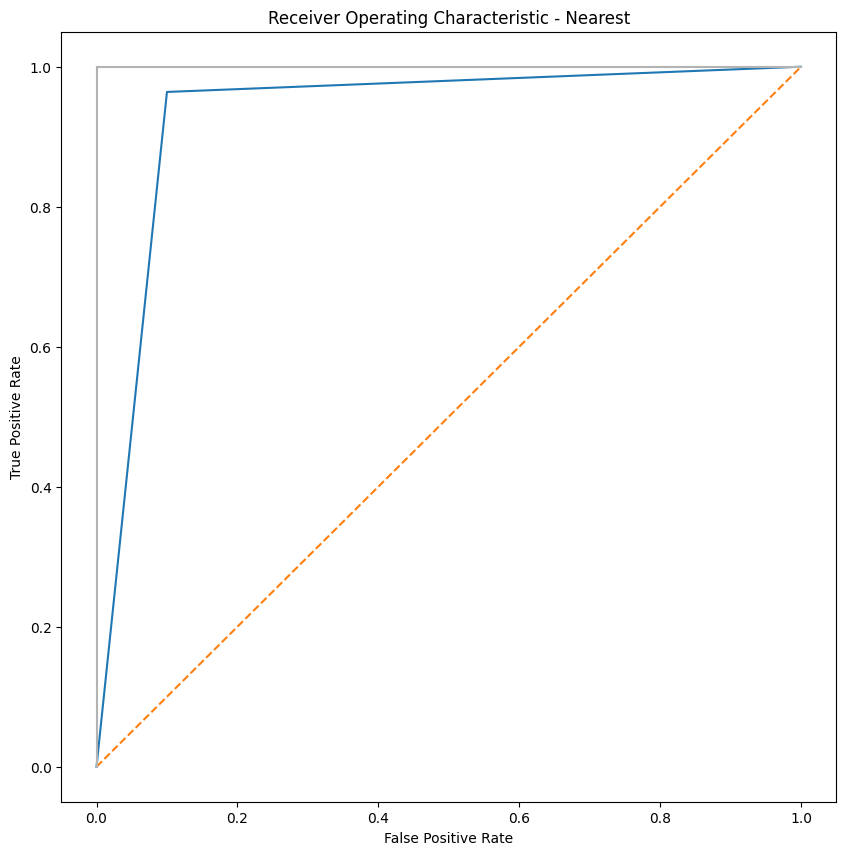

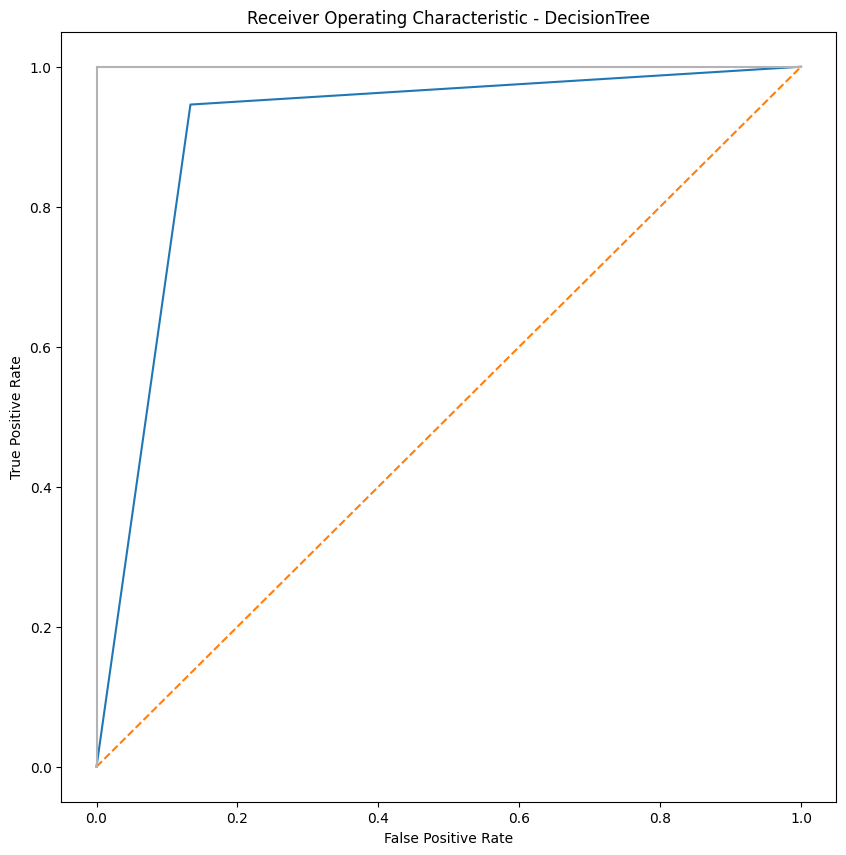

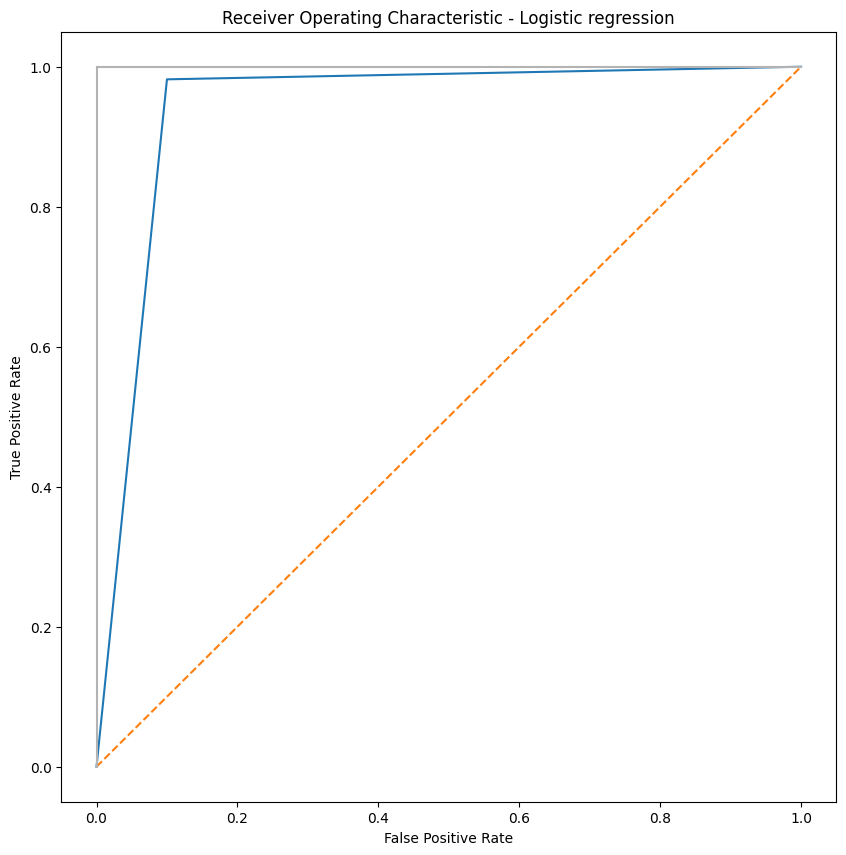

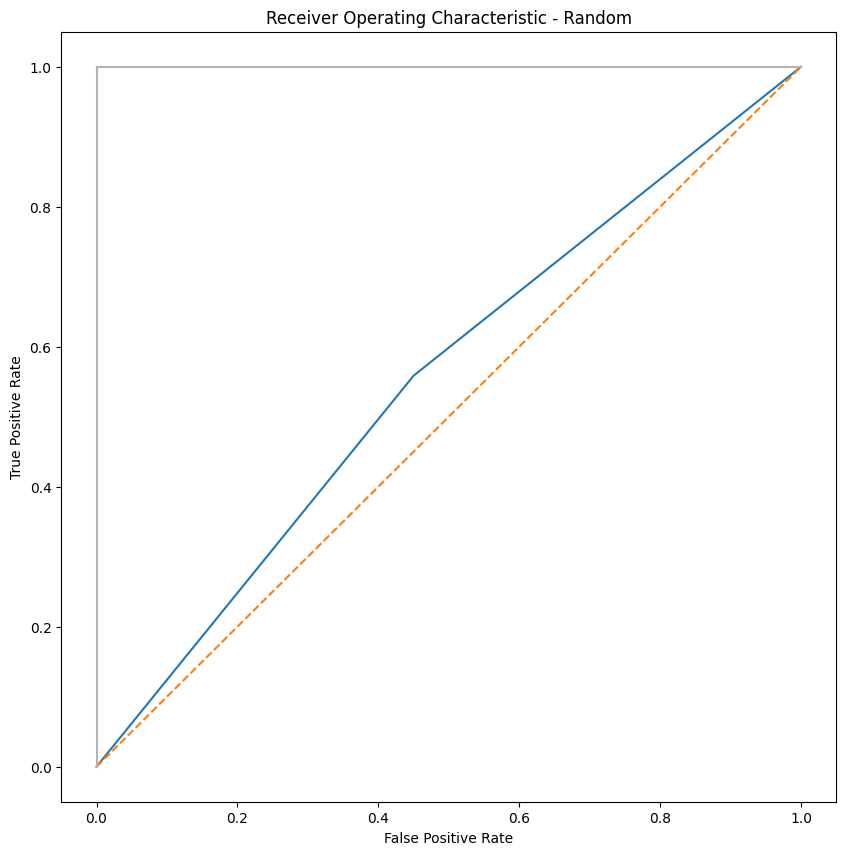

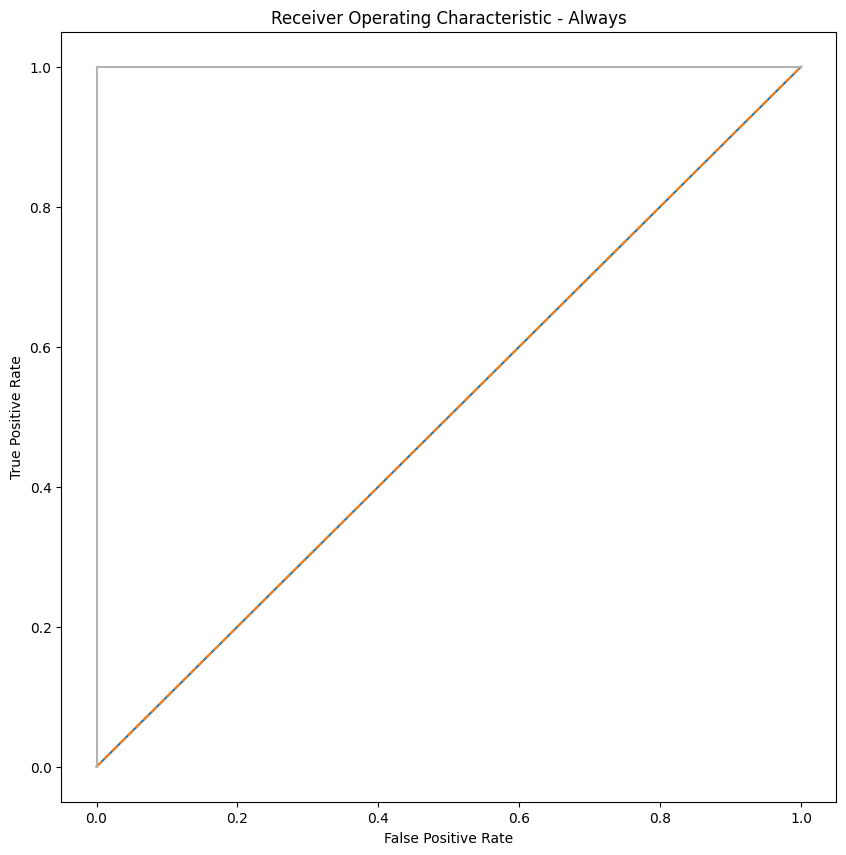

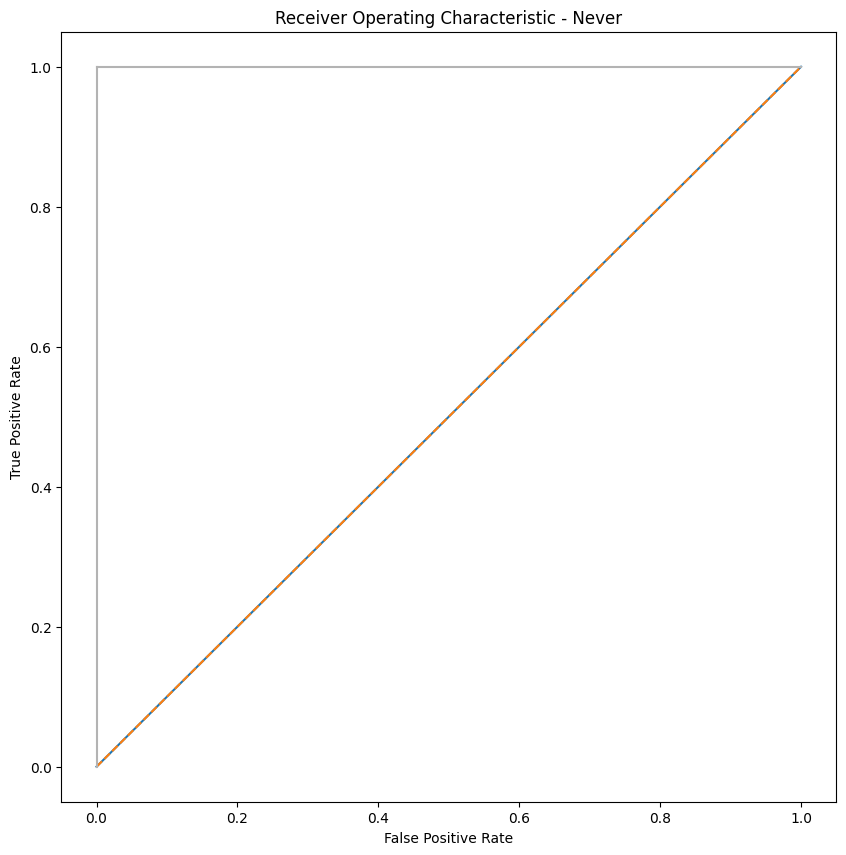

In [47]:
import matplotlib.pyplot as plt

def plotROC(title,fp,tp): # TODO: add FP and TP
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - ' + title)
    plt.plot(fp,tp) # TODO plot values one against each other
    plt.plot([0, 1], ls="--") # This draws the diagonal
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") # This draws the "perfect" score
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

plotROC("Nearest",false_positive_rate_nn,true_positive_rate_nn); # TODO add FP and TP
plotROC("DecisionTree",false_positive_rate_tree,true_positive_rate_tree); # TODO add FP and TP
plotROC("Logistic regression",false_positive_rate_log,true_positive_rate_log); # TODO add FP and TP
plotROC("Random",false_positive_rate_random,true_positive_rate_random); # TODO add FP and TP
plotROC("Always",false_positive_rate_ones,true_positive_rate_ones); # TODO add FP and TP
plotROC("Never",false_positive_rate_zeros,true_positive_rate_zeros); # TODO add FP and TP


Q: Compare the curves. What do you see?

Q: Particularly, compare the "Always cancer" and "Never cancer" curves. Why do you get these curves? Discuss their similarities and or differences.

Q: Would your preliminary ranking of the methods change after seeing these curves? Explain why or why not.

For a better comparison you can plot all curves in the same plot.
Use the parameter ```label='Data label'``` in the plot function to know which one is each and the ```plot.legend(loc="lower right")``` to show the legend.

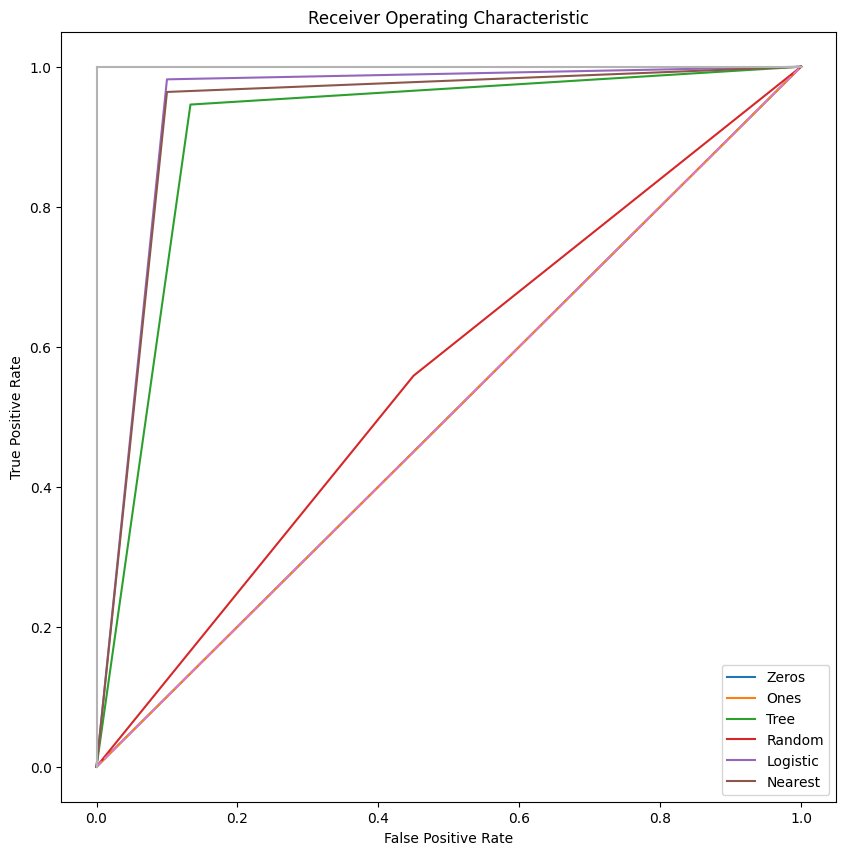

In [48]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_zeros,true_positive_rate_zeros, label="Zeros"); # TODO
plt.plot(false_positive_rate_ones,true_positive_rate_ones,  label="Ones"); # TODO
plt.plot(false_positive_rate_tree,true_positive_rate_tree,  label="Tree"); # TODO
plt.plot(false_positive_rate_random,true_positive_rate_random,  label="Random"); # TODO
plt.plot(false_positive_rate_log,true_positive_rate_log,  label="Logistic"); # TODO
plt.plot( false_positive_rate_nn,true_positive_rate_nn,  label="Nearest"); # TODO

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()



To compute the Roc Area Under Curve (AUC) score you can use the function ```roc_auc_score```

In [49]:
from sklearn.metrics import roc_auc_score

print('roc_auc_score for Nearest: ',roc_auc_score(y_test,y_pred_nn) )
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test,y_pred_tree))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test,y_pred_log)) # TODO
print('roc_auc_score for Random Guessing: ', roc_auc_score(y_test,y_pred_random)) # TODO
print('roc_auc_score for Always No Cancer: ', roc_auc_score(y_test,y_pred_zeros)) # TODO
print('roc_auc_score for Always Cancer: ', roc_auc_score(y_test,y_pred_ones)) # TODO


roc_auc_score for Nearest:  0.9319819819819819
roc_auc_score for DecisionTree:  0.9063063063063064
roc_auc_score for Logistic Regression:  0.940990990990991
roc_auc_score for Random Guessing:  0.5542792792792793
roc_auc_score for Always No Cancer:  0.5
roc_auc_score for Always Cancer:  0.5


Q: Do you have a strong preference on which method you would use? Why?

### Rerunning the process

Save the current results (screenshot or write down the roc auc scores), then go back to the beginning of the notebook and rerun the script.

roc_auc_score for Nearest:  0.9234813084112149

roc_auc_score for DecisionTree:  0.9220210280373832

roc_auc_score for Logistic Regression:  0.9718896028037383

roc_auc_score for Random Guessing:  0.4632009345794392

roc_auc_score for Always No Cancer:  0.5

roc_auc_score for Always Cancer:  0.5

Q: Do you get the same numeric results? Why? How to get some control for this variability?

## Cross validation

Cross validation is a way to evaluate on the full dataset.
The sklearn library implements the ```KFold``` function that allows to create K splits for train and test.

Use it to obtain splits, plot the positive ratio in each split in the train and in the test and their difference.

Q: What do you observe?



In [50]:
from sklearn.model_selection import KFold

n_splits=10

kfold = KFold(n_splits, shuffle=True, random_state=42)


kfold_splits = kfold.split(X)


#each split contains indices for the train and test data
for train_indices, test_indices in kfold_splits:
    # select the data for the fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # compute ratio of positive examples
    nb_train = y_train.shape[0]
    train_positive = y_train.sum()
    train_ratio = train_positive / nb_train

    nb_test = y_test.shape[0]
    test_positive = y_test.sum()
    test_ratio = test_positive / nb_test


    print("\nTrain positive Ratio:", train_ratio)
    print("Test postivie Ratio:", test_ratio)
    print("Difference:", train_ratio - test_ratio)



Train positive Ratio: 0.619140625
Test postivie Ratio: 0.7017543859649122
Difference: -0.08261376096491224

Train positive Ratio: 0.63671875
Test postivie Ratio: 0.543859649122807
Difference: 0.09285910087719296

Train positive Ratio: 0.625
Test postivie Ratio: 0.6491228070175439
Difference: -0.02412280701754388

Train positive Ratio: 0.619140625
Test postivie Ratio: 0.7017543859649122
Difference: -0.08261376096491224

Train positive Ratio: 0.62109375
Test postivie Ratio: 0.6842105263157895
Difference: -0.06311677631578949

Train positive Ratio: 0.634765625
Test postivie Ratio: 0.5614035087719298
Difference: 0.0733621162280702

Train positive Ratio: 0.619140625
Test postivie Ratio: 0.7017543859649122
Difference: -0.08261376096491224

Train positive Ratio: 0.63671875
Test postivie Ratio: 0.543859649122807
Difference: 0.09285910087719296

Train positive Ratio: 0.638671875
Test postivie Ratio: 0.5263157894736842
Difference: 0.11235608552631582

Train positive Ratio: 0.6237816764132553
Te

One way to ensure the same positive rate in the splits is to use Stratified K Fold cross validation.
Adapt the previous code to use ```StratifiedKFold``` and compare the results.

In [51]:
from sklearn.model_selection import StratifiedKFold

n_splits=10

kfold = StratifiedKFold(n_splits=5) # TODO
kfold_splits = kfold.split(X, y) # TODO


# each split contains indices for the train and test data
for train_indices, test_indices in kfold_splits:
    # select the data for the fold
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    # compute ratio of positive examples
    nb_train = y_train.shape[0]
    train_positive = y_train.sum()
    train_ratio = train_positive / nb_train

    nb_test = y_test.shape[0]
    test_positive = y_test.sum()
    test_ratio = test_positive / nb_test

    print("\nTrain positive Ratio:", train_ratio)
    print("Test postivie Ratio:", test_ratio)
    print("Difference:", train_ratio - test_ratio)



Train positive Ratio: 0.6285714285714286
Test postivie Ratio: 0.6228070175438597
Difference: 0.005764411027568861

Train positive Ratio: 0.6285714285714286
Test postivie Ratio: 0.6228070175438597
Difference: 0.005764411027568861

Train positive Ratio: 0.6263736263736264
Test postivie Ratio: 0.631578947368421
Difference: -0.005205320994794649

Train positive Ratio: 0.6263736263736264
Test postivie Ratio: 0.631578947368421
Difference: -0.005205320994794649

Train positive Ratio: 0.6271929824561403
Test postivie Ratio: 0.6283185840707964
Difference: -0.0011256016146561354


Q: Compare and discuss the differences between the ```KFold``` and ```StratifiedKFold``` methods.
https://www.datacamp.com/fr/tutorial/k-fold-cross-validation